In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the dataset
df = pd.read_csv('NB_data.csv')

In [17]:
# Split the dataset into features (Combined_Text) and target variable (Sentiment)
X = df['Combined_Text']
y = df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#X_train.to_csv('SVM_Train_set.csv', index=False)
#X_test.to_csv('SVM_Test_set.csv', index=False)
#y_train.to_csv('SVM_Train_label.csv', index=False)
#y_test.to_csv('SVM_Test_label.csv', index=False)

In [4]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train SVM models with different kernels
# 1. Linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_tfidf, y_train)
y_pred_linear = svm_linear.predict(X_test_tfidf)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)

# 2. Polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X_train_tfidf, y_train)
y_pred_poly = svm_poly.predict(X_test_tfidf)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)

# 3. Radial basis function (RBF) kernel
svm_rbf = SVC(kernel='rbf', gamma='auto', C=1)
svm_rbf.fit(X_train_tfidf, y_train)
y_pred_rbf = svm_rbf.predict(X_test_tfidf)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

In [5]:
# Print accuracies for each kernel
print("Accuracy for linear kernel:", accuracy_linear)
print("Accuracy for polynomial kernel:", accuracy_poly)
print("Accuracy for RBF kernel:", accuracy_rbf)

Accuracy for linear kernel: 1.0
Accuracy for polynomial kernel: 1.0
Accuracy for RBF kernel: 0.54


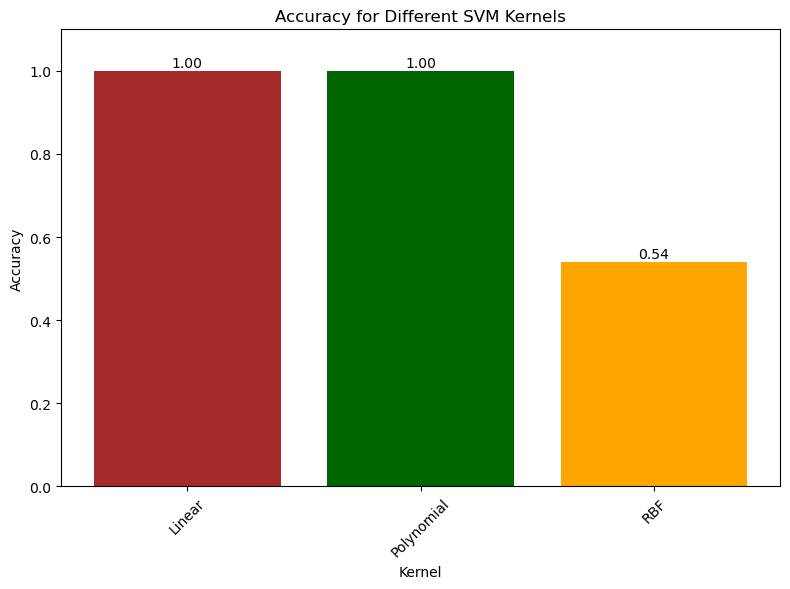

In [8]:
accuracies = [accuracy_linear, accuracy_poly, accuracy_rbf]
kernels = ['Linear', 'Polynomial', 'RBF']

# Create bar plot with unusual colors
plt.figure(figsize=(8, 6))
plt.bar(kernels, accuracies, color=['brown', 'darkgreen', 'orange'])
plt.title('Accuracy for Different SVM Kernels')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  # Set y-axis limit from 0 to 1.1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display accuracy values on top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', color='black')

plt.show()

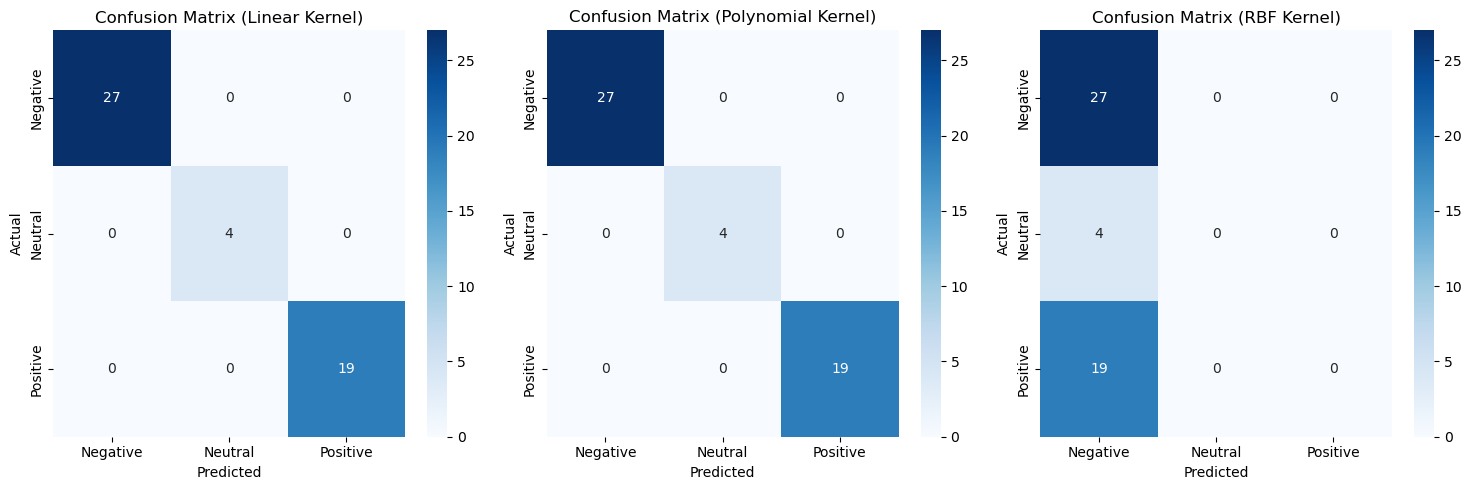

In [8]:
# Visualize confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_linear, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Linear Kernel)')

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_poly, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Polynomial Kernel)')

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (RBF Kernel)')

plt.tight_layout()
plt.show()

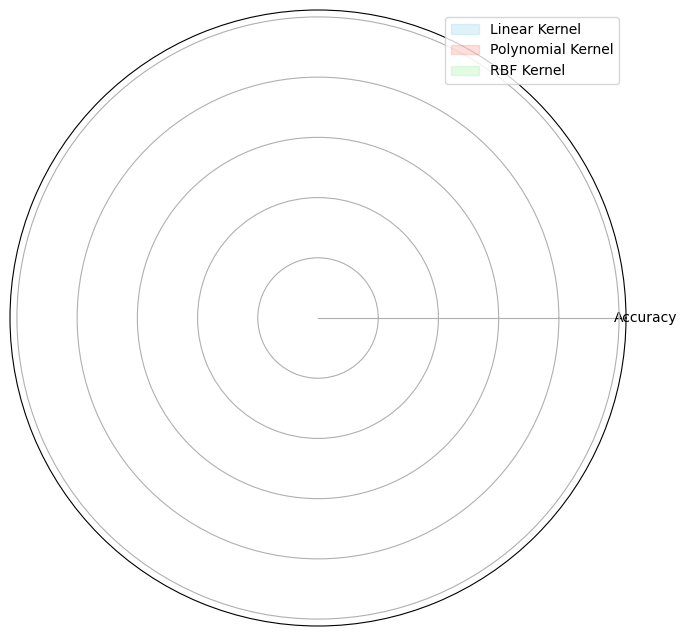

In [12]:
# Data for radar chart
labels=np.array(['Accuracy'])
linear_scores = np.array([accuracy_linear])
poly_scores = np.array([accuracy_poly])
rbf_scores = np.array([accuracy_rbf])

# Number of variables
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop
linear_scores = np.concatenate((linear_scores,[linear_scores[0]]))
poly_scores = np.concatenate((poly_scores,[poly_scores[0]]))
rbf_scores = np.concatenate((rbf_scores,[rbf_scores[0]]))
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, linear_scores, color='skyblue', alpha=0.25)
ax.fill(angles, poly_scores, color='salmon', alpha=0.25)
ax.fill(angles, rbf_scores, color='lightgreen', alpha=0.25)

# Labels for each axis
ax.set_yticklabels([])
plt.xticks(angles[:-1], labels)

# Add legend
plt.legend(['Linear Kernel', 'Polynomial Kernel', 'RBF Kernel'], loc='upper right')

plt.show()

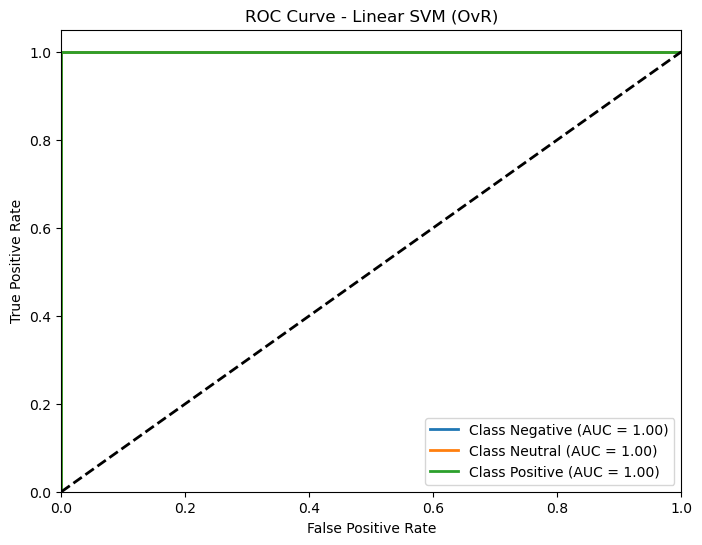

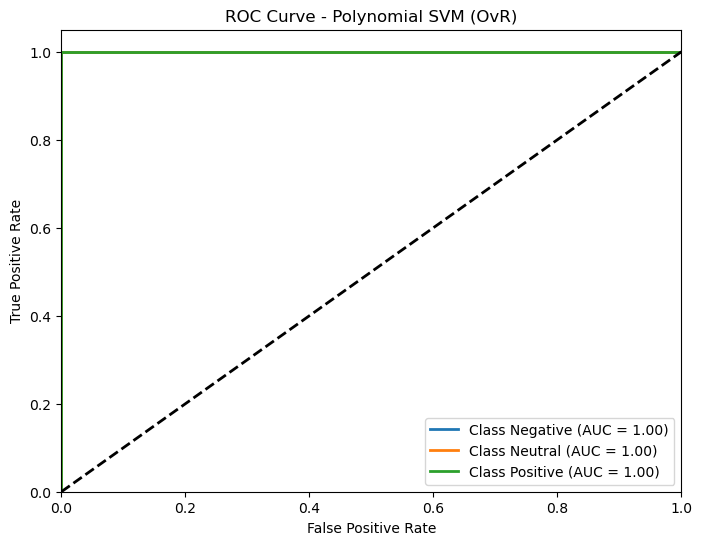

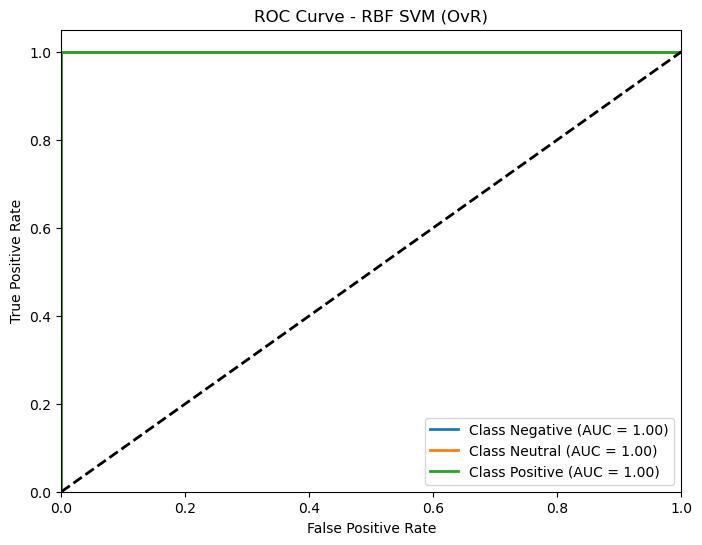

In [14]:
from sklearn.metrics import roc_curve, auc

# Define function to plot ROC curve for multiclass classification using One-vs-Rest (OvR) approach
def plot_roc_curve_multiclass(y_true, y_pred_probs, classes, title):
    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_true == classes[i], y_pred_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for each SVM model
plot_roc_curve_multiclass(y_test, svm_linear.decision_function(X_test_tfidf), svm_linear.classes_, 'ROC Curve - Linear SVM (OvR)')
plot_roc_curve_multiclass(y_test, svm_poly.decision_function(X_test_tfidf), svm_poly.classes_, 'ROC Curve - Polynomial SVM (OvR)')
plot_roc_curve_multiclass(y_test, svm_rbf.decision_function(X_test_tfidf), svm_rbf.classes_, 'ROC Curve - RBF SVM (OvR)')
